# Understanding Employee Retention at a Leading Entertainment Firm

A top entertainment company wants to understand what contributes to employee resignation, and how it can help get ahead of the attrition, and what actions it can take to prevent the voluntary terminations. I've stepped in to:
- Help the business compare and contrast the characteristics of the employees that leave voluntarily to the population that does not.
- Identify 2-3 turnover drivers that business can act on to prevent future attrition. 

# Importing the Data 

In [1]:
# Import necessary modules and set options
import pandas as pd

In [2]:
import pandas as pd

# Load data
xls = pd.ExcelFile('Employee_Dataset.xlsx')
history_data = pd.read_excel(xls, 'History Data')
terminations = pd.read_excel(xls, 'Terminations')
employee_attr = pd.read_excel(xls, 'Additional Employee Attribute')
df4 = pd.read_excel(xls, 'Data Dictionary')

# Historical Data 

The company has historical employee data for each year they have been with the company. For example, if an employee has been with the company for 10 years, there will be 10 records for that employee.

In [3]:
# First look at the 'History Data'
history_data.head(50)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,2011-12-31,1954-01-03,1989-08-28,1900-01-01,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,2012-12-31,1954-01-03,1989-08-28,1900-01-01,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,2013-12-31,1954-01-03,1989-08-28,1900-01-01,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,2014-12-31,1954-01-03,1989-08-28,1900-01-01,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [4]:
# What are the unique values for status, termreason_desc, and termtype_desc in this data?:
print(history_data.STATUS.unique())
print(history_data.termreason_desc.unique())
print(history_data.termtype_desc.unique())

['ACTIVE' 'TERMINATED']
['Not Applicable' 'Retirement' 'Resignaton' 'Layoff']
['Not Applicable' 'Voluntary' 'Involuntary']


# Generating Cross-Sectional Data from History Data

Let's look at the most recent year of data for each employee. Call this subset of the history data "history_data_2". 

In [5]:
# Identify the most recent year of data for each employee:
most_recent_year = history_data.groupby("EmployeeID").agg({"recorddate_key": "max"})
most_recent_year.head(10)

,recorddate_key
EmployeeID,
1318,2015-12-31
1319,2015-12-31
1320,2015-12-31
1321,2015-12-31
1322,2015-12-31
1323,2015-12-31
1325,2015-12-31
1328,2015-12-31
1329,2015-12-31


In [6]:
# Generating history_data_2 by doing an inner join merge between most_recent_year and history_data:
history_data_2 = pd.merge(history_data, most_recent_year, on=['EmployeeID', 'recorddate_key'], how='inner')
history_data_2.head(50)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
5,1323,2015-12-31,1962-01-09,1989-08-31,1900-01-01,53,26,Vancouver,Executive,"Exec Assistant, VP Stores",35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
6,1325,2015-12-31,1964-01-13,1989-09-02,1900-01-01,51,26,Vancouver,Executive,"Exec Assistant, Legal Counsel",35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
7,1328,2015-12-31,1956-01-17,1989-09-05,1900-01-01,59,26,Vancouver,Executive,CHief Information Officer,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
8,1329,2015-12-31,1967-01-23,1989-09-08,1900-01-01,48,26,Terrace,Store Management,Store Manager,32,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
9,1330,2015-12-31,1967-01-25,1989-09-09,1900-01-01,48,26,Terrace,Meats,Meats Manager,32,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES


In [7]:
# Let's double check that the employee IDs are all unique:
history_data_2['EmployeeID'].is_unique

True

In [8]:
# Age when hired could be a useful variable?
history_data_2['age_whenhired'] = history_data_2['age'] - history_data_2['length_of_service']
history_data_2.head(5)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,age_whenhired
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,35
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,32
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,34
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,30
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,31


In [9]:
# Checking out the unique values for some of the variables:
print(history_data_2.department_name.unique())
print(history_data_2.job_title.unique())
print(history_data_2.BUSINESS_UNIT.unique())
print(history_data_2.STATUS.unique())
print(history_data_2.termreason_desc.unique())
print(history_data_2.termtype_desc.unique())

['Executive' 'Store Management' 'Meats' 'Recruitment' 'Customer Service'
 'Produce' 'Bakery' 'Dairy' 'Processed Foods' 'Training' 'Labor Relations'
 'HR Technology' 'Employee Records' 'Compensation' 'Legal'
 'Accounts Receiveable' 'Information Technology' 'Accounts Payable'
 'Audit' 'Accounting' 'Investment']
['CEO' 'VP Stores' 'Legal Counsel' 'VP Human Resources' 'VP Finance'
 'Exec Assistant, VP Stores' 'Exec Assistant, Legal Counsel'
 'CHief Information Officer' 'Store Manager' 'Meats Manager'
 'Exec Assistant, Human Resources' 'Exec Assistant, Finance'
 'Director, Recruitment' 'Meat Cutter' 'Customer Service Manager'
 'Produce Manager' 'Bakery Manager' 'Dairy Person'
 'Processed Foods Manager' 'Produce Clerk' 'Baker' 'Shelf Stocker'
 'Cashier' 'Director, Training' 'Director, Labor Relations'
 'Director, HR Technology' 'Director, Employee Records'
 'Director, Compensation' 'Corporate Lawyer'
 'Director, Accounts Receivable' 'Systems Analyst'
 'Director, Accounts Payable' 'Director, 

In [10]:
termreason_NA_folks = history_data_2[(history_data_2['termreason_desc'] == 'Not Applicable')]
termreason_nonNA_folks = history_data_2[(history_data_2['termreason_desc'] != 'Not Applicable')]
print(termreason_NA_folks.STATUS.unique())
print(termreason_nonNA_folks.STATUS.unique())
print(termreason_NA_folks.termtype_desc.unique())
print(termreason_nonNA_folks.termtype_desc.unique())

['ACTIVE']
['TERMINATED']
['Not Applicable']
['Voluntary' 'Involuntary']


# Additional Employee Attribute Data

The entertainment firm has also provided me with employee attribute data – cross-sectional data – which captures many different attributes of each employee: his or her ethnicity, marital status, gender, compensation rate relative to that of other employees, promotions received, etc. 

In [11]:
# Checking out Additional Employee Attribute data:
employee_attr.head(10)

,EMPLOYEE ID,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
0,1318,1,2,1,53,3,1,19,1.000000,0
1,1319,1,1,1,39,2,0,17,1.000000,0
2,1320,1,3,1,47,1,0,7,1.000000,1
3,1321,1,2,2,49,2,0,9,1.000000,0
4,1322,1,1,1,54,2,0,30,1.000000,0
5,1323,1,1,1,48,3,0,21,1.053654,0
6,1325,1,1,1,51,1,1,12,1.000000,1
7,1328,2,1,2,40,2,0,14,1.000000,0
8,1329,1,1,2,54,2,0,28,1.000000,0
9,1330,1,1,2,50,2,0,21,1.000000,0


In [12]:
# Let's double check that each employee ID is unique in the Additional Employee Attribute data (employee_attr):
employee_attr['EMPLOYEE ID'].is_unique

True

In [13]:
# Renaming the "EMPLOYEE ID" column of employee_attr "EmployeeID" to match the naming in the history data
employee_attr.rename(columns={'EMPLOYEE ID': 'EmployeeID'}, inplace=True)
employee_attr.head(10)

,EmployeeID,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
0,1318,1,2,1,53,3,1,19,1.000000,0
1,1319,1,1,1,39,2,0,17,1.000000,0
2,1320,1,3,1,47,1,0,7,1.000000,1
3,1321,1,2,2,49,2,0,9,1.000000,0
4,1322,1,1,1,54,2,0,30,1.000000,0
5,1323,1,1,1,48,3,0,21,1.053654,0
6,1325,1,1,1,51,1,1,12,1.000000,1
7,1328,2,1,2,40,2,0,14,1.000000,0
8,1329,1,1,2,54,2,0,28,1.000000,0
9,1330,1,1,2,50,2,0,21,1.000000,0


# Merging Cross-Sectional History Data & Employee Attribute Data

My analysis employs both the historical data and employee attribute data. I merge the two datasets here. 

In [14]:
hist_employ_attr = pd.merge(history_data_2, employee_attr, on='EmployeeID', how='inner')
print(hist_employ_attr['EmployeeID'].is_unique)
hist_employ_attr.head()

True


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,age_whenhired,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,35,1,2,1,53,3,1,19,1.0,0
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,32,1,1,1,39,2,0,17,1.0,0
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,34,1,3,1,47,1,0,7,1.0,1
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,30,1,2,2,49,2,0,9,1.0,0
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,31,1,1,1,54,2,0,30,1.0,0


In [15]:
hist_employ_attr.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR,age_whenhired,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.00000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000
mean,5088.843094,44.742998,12.836410,27.098345,2013.979949,31.906588,1.795831,1.621579,1.512253,45.02578,1.996181,0.172661,17.448122,1.004723,0.349300
std,1956.079548,14.134458,6.747744,13.402742,2.343612,9.127339,1.209349,0.713673,0.499890,6.06464,0.817202,0.377984,7.519004,0.085426,0.476787
min,1318.000000,19.000000,0.000000,1.000000,2006.000000,19.000000,1.000000,1.000000,1.000000,35.00000,1.000000,0.000000,5.000000,0.501076,0.000000
25%,3482.750000,32.000000,7.000000,16.000000,2015.000000,25.000000,1.000000,1.000000,1.000000,40.00000,1.000000,0.000000,11.000000,1.000000,0.000000
50%,5180.500000,45.000000,13.000000,28.000000,2015.000000,31.000000,1.000000,1.000000,2.000000,45.00000,2.000000,0.000000,18.000000,1.000000,0.000000
75%,6765.250000,58.000000,19.000000,41.000000,2015.000000,37.000000,2.000000,2.000000,2.000000,50.00000,3.000000,0.000000,24.000000,1.000000,1.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000,52.000000,5.000000,3.000000,2.000000,55.00000,3.000000,1.000000,30.000000,1.204923,1.000000


# DESCRIPTIVE STATS

Before we delve into any machine learning models, let's explore some descriptive statistics

In [16]:
# Import necessary modules and set options
import matplotlib.pyplot as plt
import seaborn as sns

## Age: does it affect the resignation rate?

In [17]:
# Binning the ages
def age_binning_func (age):
    if age <=29:
        return "20's and under"
    if age >= 30 and age <=39:
        return "30's"
    if age >= 40 and age <=49:
        return "40's"
    if age >= 50 and age <=59:
        return "50's"
    if age >= 60:
        return "60's and up"
    
hist_employ_attr['age_bins'] = hist_employ_attr['age'].apply(age_binning_func)

In [18]:
age_bins_v_termreason = pd.crosstab(hist_employ_attr["age_bins"], hist_employ_attr.termreason_desc)
age_bins_v_termreason['Total'] = age_bins_v_termreason['Layoff'] + age_bins_v_termreason['Not Applicable'] + age_bins_v_termreason['Resignaton'] + age_bins_v_termreason['Retirement']
age_bins_v_termreason['Layoff Fraction'] = age_bins_v_termreason['Layoff'] / age_bins_v_termreason['Total'] * 100
age_bins_v_termreason['NA Fraction'] = age_bins_v_termreason['Not Applicable'] / age_bins_v_termreason['Total'] * 100
age_bins_v_termreason['Resignation Fraction'] = age_bins_v_termreason['Resignaton'] / age_bins_v_termreason['Total'] * 100
age_bins_v_termreason['Retirement Fraction'] = age_bins_v_termreason['Retirement'] / age_bins_v_termreason['Total'] * 100
age_bins_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
age_bins,,,,,,,,,
20's and under,54,977,194,0,1225,4.408163,79.755102,15.836735,0.000000
30's,58,1064,127,0,1249,4.643715,85.188151,10.168135,0.000000
40's,36,1077,36,0,1149,3.133159,93.733681,3.133159,0.000000
50's,40,1170,22,0,1232,3.246753,94.967532,1.785714,0.000000
60's and up,27,516,3,883,1429,1.889433,36.109167,0.209937,61.791463


In [19]:
age_bins_v_termreason_2 = age_bins_v_termreason[['Layoff', 'Not Applicable', 'Resignaton', 'Retirement']]
age_bins_v_termreason_2
age_bins_v_termreason_2.rename(columns={'Layoff': 'Laid Off', 'Not Applicable' : 'Active', 'Resignaton': "Resigned", 'Retirement' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


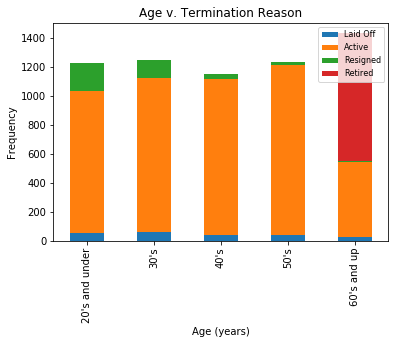

In [20]:
age_bins_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Age v. Termination Reason')
plt.xlabel('Age (years)')
plt.ylabel('Frequency') 
plt.show()

The data inform us that:  6% of all employees in the company's dataset resign

The resignation rates vary drastically once we break the data down by (fairly evenly distributed) age chunks – those in their 20’s or under, their 30’s, their 40’s, 50’s, 60’s and up: 
- When we look at those in their 20’s or under only, we find that 16% - that’s almost 1 in 6 employees - resigns
- The resignation rate steadily decreases with age
- Roughly 1 out of 10 employees in their 30’s resigns
- And once you look to employees in their 40’s, 50’s, 60’s and up, the resignation rate drops to less than 3%

Without running any fancy machine learning or statistical models, we can see here that age impacts resignation rates.

## Length of Service: hows does it relate to resignation rates? 

In [21]:
# Binning the lengths of service
def length_of_service_binning_func (service_length):
    if service_length <=5:
        return "05 years or less"
    if service_length >= 6 and service_length <=10:
        return "06-10 years"
    if service_length >= 11 and service_length <=15:
        return "11-15 years"
    if service_length >= 16 and service_length <=20:
        return "16-20 years"
    if service_length >= 21:
        return "21 years and over"
    
hist_employ_attr['length_of_service_binned'] = hist_employ_attr['length_of_service'].apply(length_of_service_binning_func)

In [22]:
service_bins_v_termreason = pd.crosstab(hist_employ_attr["length_of_service_binned"], 
                                        hist_employ_attr.termreason_desc)
service_bins_v_termreason['Total'] = service_bins_v_termreason['Layoff'] + service_bins_v_termreason['Not Applicable'] + service_bins_v_termreason['Resignaton'] + service_bins_v_termreason['Retirement']
service_bins_v_termreason['Layoff Fraction'] = service_bins_v_termreason['Layoff'] / service_bins_v_termreason['Total'] * 100
service_bins_v_termreason['NA Fraction'] = service_bins_v_termreason['Not Applicable'] / service_bins_v_termreason['Total'] * 100
service_bins_v_termreason['Resignation Fraction'] = service_bins_v_termreason['Resignaton'] / service_bins_v_termreason['Total'] * 100
service_bins_v_termreason['Retirement Fraction'] = service_bins_v_termreason['Retirement'] / service_bins_v_termreason['Total'] * 100
service_bins_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
length_of_service_binned,,,,,,,,,
05 years or less,50,805,258,0,1113,4.492363,72.327044,23.180593,0.000000
06-10 years,54,1019,79,194,1346,4.011887,75.705795,5.869242,14.413076
11-15 years,42,1040,28,470,1580,2.658228,65.822785,1.772152,29.746835
16-20 years,30,1053,15,100,1198,2.504174,87.896494,1.252087,8.347245
21 years and over,39,887,2,119,1047,3.724928,84.718243,0.191022,11.365807


In [23]:
service_bins_v_termreason_2 = service_bins_v_termreason[['Layoff', 'Not Applicable', 'Resignaton', 'Retirement']]
service_bins_v_termreason_2
service_bins_v_termreason_2.rename(columns={'Layoff': 'Laid Off', 
                                            'Not Applicable' : 'Active', 
                                            'Resignaton': "Resigned", 
                                            'Retirement' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


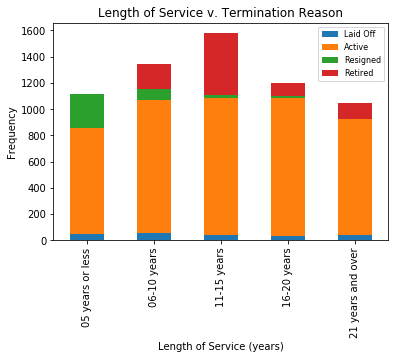

In [24]:
service_bins_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Length of Service v. Termination Reason')
plt.xlabel('Length of Service (years)')
plt.ylabel('Frequency') 
plt.show()

As with age, the results are quite stark here as well: 
- Almost a quarter of those who have been with the company for 5 years or less resign
- Resignation rates fall dramatically with length of service, however,
- Even making it into the 6-10 years of service bracket reduces the propensity to resign greatly to only 6%
- And once folks have passed the 10 year mark, the percentage of those resigning falls to under 2%

Overall, employees with 5 years or less experience are 10 times more likely to resign than their more experience colleagues


## Age v. Length of Service

Age and length of service are likely highly correlated. We investigate this here. 

In [25]:
age_bins_v_service_bins = pd.crosstab(hist_employ_attr["age_bins"], hist_employ_attr['length_of_service_binned'])
age_bins_v_service_bins[' Total'] = age_bins_v_service_bins['05 years or less'] + age_bins_v_service_bins['06-10 years'] + age_bins_v_service_bins['11-15 years'] + age_bins_v_service_bins['16-20 years'] + age_bins_v_service_bins['21 years and over'] 
age_bins_v_service_bins['  5 years or less'] = age_bins_v_service_bins['05 years or less'] / age_bins_v_service_bins[' Total'] * 100
age_bins_v_service_bins['  6-10 years'] = age_bins_v_service_bins['06-10 years'] / age_bins_v_service_bins[' Total'] * 100
age_bins_v_service_bins['  11-15 years'] = age_bins_v_service_bins['11-15 years'] / age_bins_v_service_bins[' Total'] * 100
age_bins_v_service_bins['  16-20 years'] = age_bins_v_service_bins['16-20 years'] / age_bins_v_service_bins[' Total'] * 100
age_bins_v_service_bins['  21 years and over'] = age_bins_v_service_bins['21 years and over'] / age_bins_v_service_bins[' Total'] * 100

age_bins_v_service_bins

length_of_service_binned,05 years or less,06-10 years,11-15 years,16-20 years,21 years and over,Total,5 years or less,6-10 years,11-15 years,16-20 years,21 years and over
age_bins,,,,,,,,,,,
20's and under,1049,176,0,0,0,1225,85.632653,14.367347,0.000000,0.000000,0.000000
30's,64,960,225,0,0,1249,5.124099,76.861489,18.014412,0.000000,0.000000
40's,0,16,875,256,2,1149,0.000000,1.392515,76.153177,22.280244,0.174064
50's,0,0,8,841,383,1232,0.000000,0.000000,0.649351,68.262987,31.087662
60's and up,0,194,472,101,662,1429,0.000000,13.575927,33.030091,7.067880,46.326102


In [26]:
age_bins_v_service_bins_2 = age_bins_v_service_bins[['  5 years or less', '  6-10 years', '  11-15 years', '  16-20 years', '  21 years and over']]


In [27]:
age_bins_v_service_bins_2

length_of_service_binned,5 years or less,6-10 years,11-15 years,16-20 years,21 years and over
age_bins,,,,,
20's and under,85.632653,14.367347,0.000000,0.000000,0.000000
30's,5.124099,76.861489,18.014412,0.000000,0.000000
40's,0.000000,1.392515,76.153177,22.280244,0.174064
50's,0.000000,0.000000,0.649351,68.262987,31.087662
60's and up,0.000000,13.575927,33.030091,7.067880,46.326102


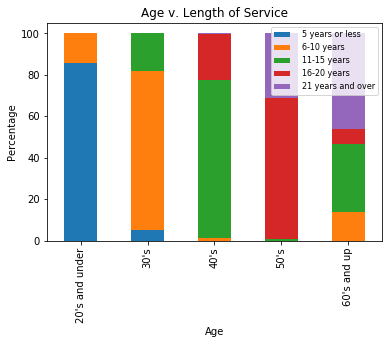

In [28]:
age_bins_v_service_bins_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Age v. Length of Service')
plt.xlabel('Age')
plt.ylabel('Percentage') 
plt.show()

In [29]:
hist_employ_attr['age'].corr(hist_employ_attr['length_of_service'])

0.8493076692730617

Not surprisingly, of course, age and length of service are highly correlated:

- 86% of those in their 20’s or under have been with the company for 5 years or less – understandably 
- Over 3/4ths of folks in their 30’s have been with the company for 6-10 years and almost 1 in 5 of them have been with the company for 11-15 years

Looking at the Pearson’s correlation coefficient, we see that age and length of service are strongly correlated

It’s important to make note of this early on – you can run into problems of multicollinearity in a regression model context if you throw in both of these variables 

## Gender & Resignation Rates

In [30]:
gender_v_termreason = pd.crosstab(hist_employ_attr.gender_full, hist_employ_attr.termreason_desc)
gender_v_termreason['Total'] = gender_v_termreason['Layoff'] + gender_v_termreason['Not Applicable'] + gender_v_termreason['Resignaton'] + gender_v_termreason['Retirement']
gender_v_termreason['Layoff Fraction'] = gender_v_termreason['Layoff'] / gender_v_termreason['Total'] * 100
gender_v_termreason['NA Fraction'] = gender_v_termreason['Not Applicable'] / gender_v_termreason['Total'] * 100
gender_v_termreason['Resignation Fraction'] = gender_v_termreason['Resignaton'] / gender_v_termreason['Total'] * 100
gender_v_termreason['Retirement Fraction'] = gender_v_termreason['Retirement'] / gender_v_termreason['Total'] * 100
gender_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
gender_full,,,,,,,,,
Female,113,2368,208,589,3278,3.447224,72.239170,6.345333,17.968273
Male,102,2436,174,294,3006,3.393214,81.037924,5.788423,9.780439


In [31]:
gender_v_termreason_2 = gender_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
gender_v_termreason_2

gender_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)


/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


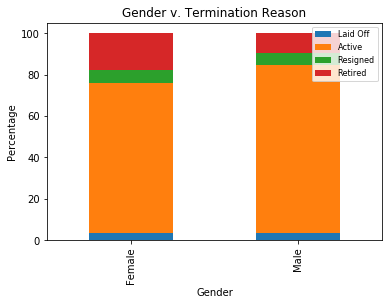

In [32]:
gender_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Gender v. Termination Reason')
plt.xlabel('Gender')
plt.ylabel('Percentage') 
plt.show()

Resignation rates are roughly equivalent between the two genders

## Ethnicity & Resignation Rates

In [33]:
ethnicity_number_dict = {1:'White', 2:'Asian', 3:'Black', 4:'Hispanic', 5:'Other'}

def ethnic_num_to_label(num): 
    return ethnicity_number_dict[num]
ethnic_num_to_label(1)

'White'

In [34]:
hist_employ_attr['ethnicity_names'] = hist_employ_attr['Ethnicity'].apply(ethnic_num_to_label)
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,1,53,3,1,19,1.0,0,60's and up,21 years and over,White
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,1,39,2,0,17,1.0,0,50's,21 years and over,White
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,1,47,1,0,7,1.0,1,60's and up,21 years and over,White
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,2,49,2,0,9,1.0,0,50's,21 years and over,White
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,1,54,2,0,30,1.0,0,50's,21 years and over,White


In [35]:
ethnicity_v_termreason = pd.crosstab(hist_employ_attr.ethnicity_names, hist_employ_attr.termreason_desc)
ethnicity_v_termreason['Total'] = ethnicity_v_termreason['Layoff'] + ethnicity_v_termreason['Not Applicable'] + ethnicity_v_termreason['Resignaton'] + ethnicity_v_termreason['Retirement']
ethnicity_v_termreason['Layoff Fraction'] = ethnicity_v_termreason['Layoff'] / ethnicity_v_termreason['Total'] * 100
ethnicity_v_termreason['NA Fraction'] = ethnicity_v_termreason['Not Applicable'] / ethnicity_v_termreason['Total'] * 100
ethnicity_v_termreason['Resignation Fraction'] = ethnicity_v_termreason['Resignaton'] / ethnicity_v_termreason['Total'] * 100
ethnicity_v_termreason['Retirement Fraction'] = ethnicity_v_termreason['Retirement'] / ethnicity_v_termreason['Total'] * 100
ethnicity_v_termreason['Ethnicity_Labels'] = ['White', 'Asian', 'Black', 'Hispanic', 'Other']
ethnicity_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction,Ethnicity_Labels
ethnicity_names,,,,,,,,,,
Asian,23,727,47,116,913,2.519168,79.627601,5.147864,12.705367,White
Black,13,279,8,82,382,3.403141,73.036649,2.094241,21.465969,Asian
Hispanic,30,669,71,86,856,3.504673,78.154206,8.294393,10.046729,Black
Other,12,131,27,19,189,6.349206,69.312169,14.285714,10.052910,Hispanic
White,137,2998,229,580,3944,3.473631,76.014199,5.806288,14.705882,Other


In [36]:
ethnicity_v_termreason_2 = ethnicity_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
ethnicity_v_termreason_2

ethnicity_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


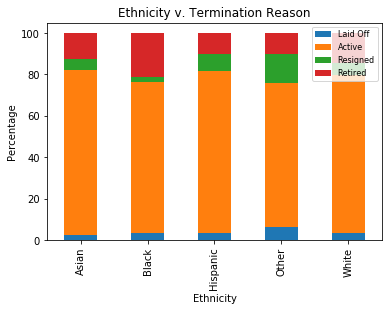

In [37]:
ethnicity_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Ethnicity v. Termination Reason')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage') 
plt.show()

We see that ethnicity also impacts resignation rates 

- Only 2% of black employees in the data resign
- The rates go up to 5-6% for whites and Asians, 8% for Hispanic folks, and 14% for the remaining ethnic groups 

This too informs us that ethnicity is an important factor to pay attention to when running a statistical analysis 


## Marital Status & Resignation Rates

In [38]:
marital_number_dict = {1:'Married', 2:'Single', 3:'Unknown'}

def marital_num_to_label(num): 
    return marital_number_dict[num]

marital_num_to_label(1)

'Married'

In [39]:
hist_employ_attr['marital_labels'] = hist_employ_attr['Marital Status'].apply(marital_num_to_label)
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names,marital_labels
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,53,3,1,19,1.0,0,60's and up,21 years and over,White,Single
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,39,2,0,17,1.0,0,50's,21 years and over,White,Married
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,47,1,0,7,1.0,1,60's and up,21 years and over,White,Unknown
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,49,2,0,9,1.0,0,50's,21 years and over,White,Single
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,54,2,0,30,1.0,0,50's,21 years and over,White,Married


In [40]:
marital_v_termreason = pd.crosstab(hist_employ_attr['marital_labels'], hist_employ_attr.termreason_desc)
marital_v_termreason['Total'] = marital_v_termreason['Layoff'] + marital_v_termreason['Not Applicable'] + marital_v_termreason['Resignaton'] + marital_v_termreason['Retirement']
marital_v_termreason['Layoff Fraction'] = marital_v_termreason['Layoff'] / marital_v_termreason['Total'] * 100
marital_v_termreason['NA Fraction'] = marital_v_termreason['Not Applicable'] / marital_v_termreason['Total'] * 100
marital_v_termreason['Resignation Fraction'] = marital_v_termreason['Resignaton'] / marital_v_termreason['Total'] * 100
marital_v_termreason['Retirement Fraction'] = marital_v_termreason['Retirement'] / marital_v_termreason['Total'] * 100
marital_v_termreason['Marital_Labels'] = ['Married', 'Single', 'Unknown']
marital_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction,Marital_Labels
marital_labels,,,,,,,,,,
Married,121,2475,201,442,3239,3.735721,76.412473,6.205619,13.646187,Married
Single,71,1667,131,315,2184,3.250916,76.327839,5.998168,14.423077,Single
Unknown,23,662,50,126,861,2.671312,76.887340,5.807201,14.634146,Unknown


In [41]:
marital_v_termreason_2 = marital_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
marital_v_termreason_2

marital_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


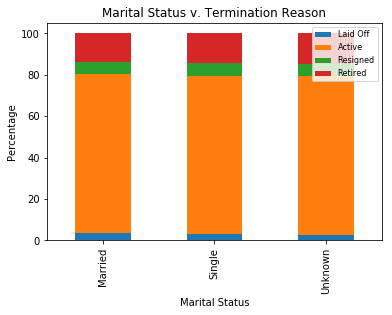

In [42]:
marital_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Marital Status v. Termination Reason')
plt.xlabel('Marital Status')
plt.ylabel('Percentage') 
plt.show()

Resignation rates are roughly equivalent between the different marital groups

## The Manager's Gender & Its Effect on Resignation Rates

In [43]:
def number_to_gender(num):
    if num == 1:
        return 'Female'
    else:
        return 'Male'

hist_employ_attr['manager_gender_full'] = hist_employ_attr["Manager's Gender"].apply(number_to_gender)
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names,marital_labels,manager_gender_full
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,3,1,19,1.0,0,60's and up,21 years and over,White,Single,Female
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,2,0,17,1.0,0,50's,21 years and over,White,Married,Female
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,1,0,7,1.0,1,60's and up,21 years and over,White,Unknown,Female
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,2,0,9,1.0,0,50's,21 years and over,White,Single,Male
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,2,0,30,1.0,0,50's,21 years and over,White,Married,Female


In [44]:
manager_gender_v_termreason = pd.crosstab(hist_employ_attr['manager_gender_full'], hist_employ_attr.termreason_desc)
manager_gender_v_termreason['Total'] = manager_gender_v_termreason['Layoff'] +  manager_gender_v_termreason['Not Applicable'] + manager_gender_v_termreason['Resignaton'] + manager_gender_v_termreason['Retirement']
manager_gender_v_termreason['Layoff Fraction'] = manager_gender_v_termreason['Layoff'] / manager_gender_v_termreason['Total'] * 100
manager_gender_v_termreason['NA Fraction'] = manager_gender_v_termreason['Not Applicable'] / manager_gender_v_termreason['Total'] * 100
manager_gender_v_termreason['Resignation Fraction'] = manager_gender_v_termreason['Resignaton'] / manager_gender_v_termreason['Total'] * 100
manager_gender_v_termreason['Retirement Fraction'] = manager_gender_v_termreason['Retirement'] / manager_gender_v_termreason['Total'] * 100
manager_gender_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
manager_gender_full,,,,,,,,,
Female,105,2345,190,425,3065,3.425775,76.508972,6.199021,13.866232
Male,110,2459,192,458,3219,3.417210,76.390183,5.964585,14.228021


In [45]:
manager_gender_v_termreason_2 = manager_gender_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
manager_gender_v_termreason_2

manager_gender_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)


/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


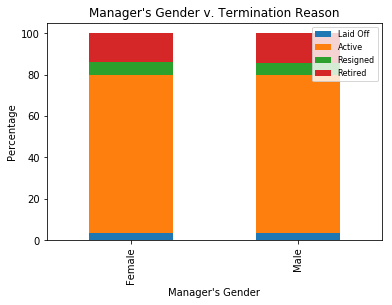

In [46]:
manager_gender_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title("Manager's Gender v. Termination Reason")
plt.xlabel("Manager's Gender")
plt.ylabel('Percentage') 
plt.show()

Resignation rates are roughly equivalent between employees who have female managers and those who have male ones

## Exploring the Interaction between Employee Gender & Manager's Gender

Resignation rates are roughly equivalent between employees who have female managers and those who have male ones. But could the combination of an employee's gender and manager's gender together affect resignation rates? We explore this next.

In [47]:
hist_employ_attr['employee_manager_genders'] = hist_employ_attr['gender_full'] + "_" + hist_employ_attr['manager_gender_full']
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names,marital_labels,manager_gender_full,employee_manager_genders
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,1,19,1.0,0,60's and up,21 years and over,White,Single,Female,Male_Female
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,0,17,1.0,0,50's,21 years and over,White,Married,Female,Female_Female
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,0,7,1.0,1,60's and up,21 years and over,White,Unknown,Female,Female_Female
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,0,9,1.0,0,50's,21 years and over,White,Single,Male,Male_Male
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,0,30,1.0,0,50's,21 years and over,White,Married,Female,Male_Female


In [48]:
employee_manager_genders_v_termreason = pd.crosstab(hist_employ_attr['employee_manager_genders'], hist_employ_attr.termreason_desc)
employee_manager_genders_v_termreason['Total'] = employee_manager_genders_v_termreason['Layoff'] + employee_manager_genders_v_termreason['Not Applicable'] + employee_manager_genders_v_termreason['Resignaton'] + employee_manager_genders_v_termreason['Retirement']
employee_manager_genders_v_termreason['Layoff Fraction'] = employee_manager_genders_v_termreason['Layoff'] / employee_manager_genders_v_termreason['Total'] * 100
employee_manager_genders_v_termreason['NA Fraction'] = employee_manager_genders_v_termreason['Not Applicable'] / employee_manager_genders_v_termreason['Total'] * 100
employee_manager_genders_v_termreason['Resignation Fraction'] = employee_manager_genders_v_termreason['Resignaton'] / employee_manager_genders_v_termreason['Total'] * 100
employee_manager_genders_v_termreason['Retirement Fraction'] = employee_manager_genders_v_termreason['Retirement'] / employee_manager_genders_v_termreason['Total'] * 100
#employee_manager_genders_v_termreason['Marital_Labels'] = ['Married', 'Single', 'Unknown']
employee_manager_genders_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
employee_manager_genders,,,,,,,,,
Female_Female,51,1167,101,289,1608,3.171642,72.574627,6.281095,17.972637
Female_Male,62,1201,107,300,1670,3.712575,71.916168,6.407186,17.964072
Male_Female,54,1178,89,136,1457,3.706246,80.851064,6.108442,9.334248
Male_Male,48,1258,85,158,1549,3.098773,81.213686,5.487411,10.200129


Resignation rates are roughly equivalent between employee-manager gender pair groups

## Promotions and Resignation Rates

In [49]:
hist_employ_attr.head()
hist_employ_attr.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR,age_whenhired,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.00000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000
mean,5088.843094,44.742998,12.836410,27.098345,2013.979949,31.906588,1.795831,1.621579,1.512253,45.02578,1.996181,0.172661,17.448122,1.004723,0.349300
std,1956.079548,14.134458,6.747744,13.402742,2.343612,9.127339,1.209349,0.713673,0.499890,6.06464,0.817202,0.377984,7.519004,0.085426,0.476787
min,1318.000000,19.000000,0.000000,1.000000,2006.000000,19.000000,1.000000,1.000000,1.000000,35.00000,1.000000,0.000000,5.000000,0.501076,0.000000
25%,3482.750000,32.000000,7.000000,16.000000,2015.000000,25.000000,1.000000,1.000000,1.000000,40.00000,1.000000,0.000000,11.000000,1.000000,0.000000
50%,5180.500000,45.000000,13.000000,28.000000,2015.000000,31.000000,1.000000,1.000000,2.000000,45.00000,2.000000,0.000000,18.000000,1.000000,0.000000
75%,6765.250000,58.000000,19.000000,41.000000,2015.000000,37.000000,2.000000,2.000000,2.000000,50.00000,3.000000,0.000000,24.000000,1.000000,1.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000,52.000000,5.000000,3.000000,2.000000,55.00000,3.000000,1.000000,30.000000,1.204923,1.000000


In [50]:
promotions_v_termreason = pd.crosstab(hist_employ_attr['Number of Promotions'], hist_employ_attr.termreason_desc)
promotions_v_termreason['Total'] = promotions_v_termreason['Layoff'] + promotions_v_termreason['Not Applicable'] + promotions_v_termreason['Resignaton'] + promotions_v_termreason['Retirement']
promotions_v_termreason['Layoff Fraction'] = promotions_v_termreason['Layoff'] / promotions_v_termreason['Total'] * 100
promotions_v_termreason['NA Fraction'] = promotions_v_termreason['Not Applicable'] / promotions_v_termreason['Total'] * 100
promotions_v_termreason['Resignation Fraction'] = promotions_v_termreason['Resignaton'] / promotions_v_termreason['Total'] * 100
promotions_v_termreason['Retirement Fraction'] = promotions_v_termreason['Retirement'] / promotions_v_termreason['Total'] * 100
promotions_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
Number of Promotions,,,,,,,,,
1,61,1645,114,290,2110,2.890995,77.962085,5.402844,13.744076
2,75,1577,134,302,2088,3.591954,75.526820,6.417625,14.463602
3,79,1582,134,291,2086,3.787152,75.838926,6.423778,13.950144


In [51]:
promotions_v_termreason_2 = promotions_v_termreason[['Layoff', 'Not Applicable', 'Resignaton', 'Retirement']]
promotions_v_termreason_2
promotions_v_termreason_2.rename(columns={'Layoff': 'Laid Off', 'Not Applicable' : 'Active', 'Resignaton': "Resigned", 'Retirement' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


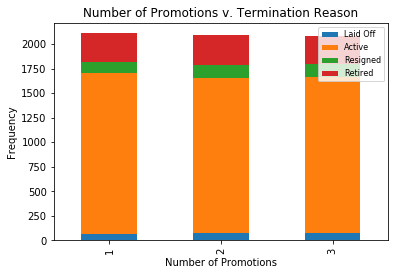

In [52]:
promotions_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Number of Promotions v. Termination Reason')
plt.xlabel('Number of Promotions')
plt.ylabel('Frequency') 
plt.show()

## Compa-Ratio & Resignation Rates

The compa-ratio is defined as an employee’s base pay or primary compensation / median compensation

In [53]:
# Let's bin the compa-ratios
def compa_ratio_binning_func (compa_ratio):
    if compa_ratio < 1:
        return "  Below the average"
    
    if compa_ratio == 1:
        return " Average"
        
    if compa_ratio > 1:
        return "Above the average"
    
hist_employ_attr['compa_ratio_bins'] = hist_employ_attr['Compa-Ratio'].apply(compa_ratio_binning_func)
hist_employ_attr.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Distance from Work (miles),Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names,marital_labels,manager_gender_full,employee_manager_genders,compa_ratio_bins
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,19,1.0,0,60's and up,21 years and over,White,Single,Female,Male_Female,Average
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,17,1.0,0,50's,21 years and over,White,Married,Female,Female_Female,Average
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,7,1.0,1,60's and up,21 years and over,White,Unknown,Female,Female_Female,Average
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,9,1.0,0,50's,21 years and over,White,Single,Male,Male_Male,Average
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,30,1.0,0,50's,21 years and over,White,Married,Female,Male_Female,Average


In [54]:
compa_ratio_bins_v_termreason = pd.crosstab(hist_employ_attr["compa_ratio_bins"], hist_employ_attr.termreason_desc)
compa_ratio_bins_v_termreason['Total'] = compa_ratio_bins_v_termreason['Layoff'] + compa_ratio_bins_v_termreason['Not Applicable'] + compa_ratio_bins_v_termreason['Resignaton'] + compa_ratio_bins_v_termreason['Retirement']
compa_ratio_bins_v_termreason['Layoff Fraction'] = compa_ratio_bins_v_termreason['Layoff'] / compa_ratio_bins_v_termreason['Total'] * 100
compa_ratio_bins_v_termreason['NA Fraction'] = compa_ratio_bins_v_termreason['Not Applicable'] / compa_ratio_bins_v_termreason['Total'] * 100
compa_ratio_bins_v_termreason['Resignation Fraction'] = compa_ratio_bins_v_termreason['Resignaton'] / compa_ratio_bins_v_termreason['Total'] * 100
compa_ratio_bins_v_termreason['Retirement Fraction'] = compa_ratio_bins_v_termreason['Retirement'] / compa_ratio_bins_v_termreason['Total'] * 100
compa_ratio_bins_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
compa_ratio_bins,,,,,,,,,
Below the average,17,269,37,35,358,4.748603,75.139665,10.335196,9.776536
Average,165,3603,277,687,4732,3.486898,76.141167,5.853762,14.518174
Above the average,33,932,68,161,1194,2.763819,78.056951,5.695142,13.484087


In [55]:
compa_ratio_bins_v_termreason_2 = compa_ratio_bins_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
compa_ratio_bins_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)
compa_ratio_bins_v_termreason_2

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


termreason_desc,Laid Off,Active,Resigned,Retired
compa_ratio_bins,,,,
Below the average,4.748603,75.139665,10.335196,9.776536
Average,3.486898,76.141167,5.853762,14.518174
Above the average,2.763819,78.056951,5.695142,13.484087


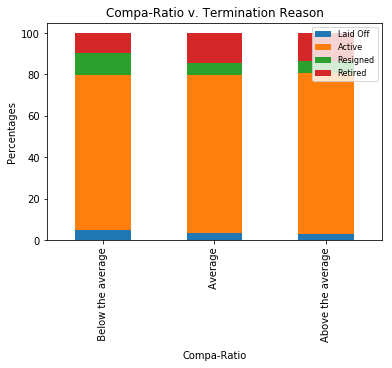

In [56]:
compa_ratio_bins_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Compa-Ratio v. Termination Reason')
plt.xlabel('Compa-Ratio')
plt.ylabel('Percentages') 
plt.show()

Main finding: those receiving below the median pay are 1.75 times more likely to resign than those at the median or above median salary 

## Distance from Work: Does it Affect Resignation?

In [57]:
hist_employ_attr['Distance from Work (miles)'].describe()

count    6284.000000
mean       17.448122
std         7.519004
min         5.000000
25%        11.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: Distance from Work (miles), dtype: float64

In [58]:
# Binning distance
def distance_binning_func (distance):
    if distance <=10:
        return "10 miles or under"
    if distance >= 11 and distance <=20:
        return "11 - 20 miles"
    if distance >= 21:
        return "21 miles or more"
    
hist_employ_attr['distance_bins'] = hist_employ_attr['Distance from Work (miles)'].apply(distance_binning_func)
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,Compa-Ratio,Is Manager,age_bins,length_of_service_binned,ethnicity_names,marital_labels,manager_gender_full,employee_manager_genders,compa_ratio_bins,distance_bins
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,1.0,0,60's and up,21 years and over,White,Single,Female,Male_Female,Average,11 - 20 miles
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,1.0,0,50's,21 years and over,White,Married,Female,Female_Female,Average,11 - 20 miles
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,1.0,1,60's and up,21 years and over,White,Unknown,Female,Female_Female,Average,10 miles or under
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,1.0,0,50's,21 years and over,White,Single,Male,Male_Male,Average,10 miles or under
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,1.0,0,50's,21 years and over,White,Married,Female,Male_Female,Average,21 miles or more


In [59]:
distance_bins_v_termreason = pd.crosstab(hist_employ_attr["distance_bins"], hist_employ_attr.termreason_desc)
distance_bins_v_termreason['Total'] = distance_bins_v_termreason['Layoff'] + distance_bins_v_termreason['Not Applicable'] + distance_bins_v_termreason['Resignaton'] + distance_bins_v_termreason['Retirement']
distance_bins_v_termreason['Layoff Fraction'] = distance_bins_v_termreason['Layoff'] / distance_bins_v_termreason['Total'] * 100
distance_bins_v_termreason['NA Fraction'] = distance_bins_v_termreason['Not Applicable'] / distance_bins_v_termreason['Total'] * 100
distance_bins_v_termreason['Resignation Fraction'] = distance_bins_v_termreason['Resignaton'] / distance_bins_v_termreason['Total'] * 100
distance_bins_v_termreason['Retirement Fraction'] = distance_bins_v_termreason['Retirement'] / distance_bins_v_termreason['Total'] * 100
distance_bins_v_termreason

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,Total,Layoff Fraction,NA Fraction,Resignation Fraction,Retirement Fraction
distance_bins,,,,,,,,,
10 miles or under,58,1125,85,197,1465,3.959044,76.791809,5.802048,13.447099
11 - 20 miles,77,1815,157,360,2409,3.196347,75.342466,6.517227,14.943960
21 miles or more,80,1864,140,326,2410,3.319502,77.344398,5.809129,13.526971


In [60]:
distance_bins_v_termreason_2 = distance_bins_v_termreason[['Layoff Fraction', 'NA Fraction', 'Resignation Fraction', 'Retirement Fraction']]
distance_bins_v_termreason_2

distance_bins_v_termreason_2.rename(columns={'Layoff Fraction': 'Laid Off', 'NA Fraction' : 'Active', 'Resignation Fraction': "Resigned", 'Retirement Fraction' : 'Retired'}, inplace=True)

/Users/daliayadegar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


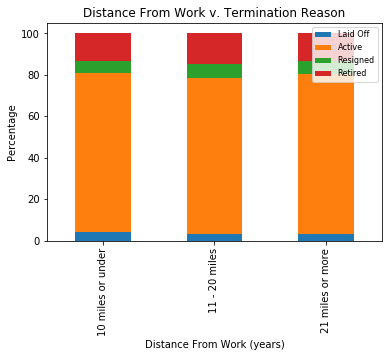

In [61]:
distance_bins_v_termreason_2.plot.bar(stacked=True)
plt.legend(
    prop={'size': 8}, loc='upper right')
plt.title('Distance From Work v. Termination Reason')
plt.xlabel('Distance From Work (years)')
plt.ylabel('Percentage') 
plt.show()

# MORE CLEANING DATA BEFORE MACHINE LEARNING

To prevent further attrition (resignation), we must home in on who is likely to resign and why. This boils down to a classification problem. We have the termination reason for each employee. We could build a multi-classification model – predicting one’s getting laid off, retiring, resigning, or staying active. But we are really interested in understanding what leads to employee resignation specifically, so below I reduce the problem down to a binary one. I construct a binary output (dependent) variable that is = 1 if the employee resigned, 0 otherwise. 

Below I also one-hot encode any categorical variable to be considered in my analysis (such as ethnicity, gender, etc). 

In [62]:
# Let's clean the gender variables (switch them from labels to corresponding numbers):

def gender_to_num(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    
hist_employ_attr['gender_num'] = hist_employ_attr['gender_full'].apply(gender_to_num)
hist_employ_attr['manager_gender_num'] = hist_employ_attr['manager_gender_full'].apply(gender_to_num)
hist_employ_attr[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,age_bins,length_of_service_binned,ethnicity_names,marital_labels,manager_gender_full,employee_manager_genders,compa_ratio_bins,distance_bins,gender_num,manager_gender_num
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,60's and up,21 years and over,White,Single,Female,Male_Female,Average,11 - 20 miles,0,1
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,50's,21 years and over,White,Married,Female,Female_Female,Average,11 - 20 miles,1,1
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,60's and up,21 years and over,White,Unknown,Female,Female_Female,Average,10 miles or under,1,1
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,50's,21 years and over,White,Single,Male,Male_Male,Average,10 miles or under,0,0
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,50's,21 years and over,White,Married,Female,Male_Female,Average,21 miles or more,0,1


In [63]:
# Generating ethnicity dummy variables
ethnicity_dummies = pd.get_dummies(hist_employ_attr['Ethnicity'])
ethnicity_dummies.rename(columns={1: 'Ethnicity_White', 2: 'Ethnicity_Asian', 3: 'Ethnicity_Black', 4: 'Ethnicity_Hispanic', 5: 'Ethnicity_Other'}, inplace=True)
ethnicity_dummies[:5]

,Ethnicity_White,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [64]:
# Generating marital dummy variables
marital_dummies = pd.get_dummies(hist_employ_attr['Marital Status'])
marital_dummies.rename(columns={1: 'Marital_Status_Married', 2: 'Marital_Status_Single', 3: 'Marital_Status_Other'}, inplace=True)
marital_dummies[:5]

,Marital_Status_Married,Marital_Status_Single,Marital_Status_Other
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [65]:
# Generating department dummy variables
# Again, must make sure that only n - 1  are used in logit reg
department_name_dummies = pd.get_dummies(hist_employ_attr['department_name']) #, drop_first=True)
department_name_dummies[:5]

,Accounting,Accounts Payable,Accounts Receiveable,Audit,Bakery,Compensation,Customer Service,Dairy,Employee Records,Executive,...,Information Technology,Investment,Labor Relations,Legal,Meats,Processed Foods,Produce,Recruitment,Store Management,Training
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
dept_names = list(department_name_dummies)
dept_names

['Accounting',
 'Accounts Payable',
 'Accounts Receiveable',
 'Audit',
 'Bakery',
 'Compensation',
 'Customer Service',
 'Dairy',
 'Employee Records',
 'Executive',
 'HR Technology',
 'Information Technology',
 'Investment',
 'Labor Relations',
 'Legal',
 'Meats',
 'Processed Foods',
 'Produce',
 'Recruitment',
 'Store Management',
 'Training']

In [67]:
def add_dept_prefix(dept):
    return 'department_' + dept

dept_names_w_prefix = [add_dept_prefix(dept) for dept in dept_names]
dept_names_w_prefix

['department_Accounting',
 'department_Accounts Payable',
 'department_Accounts Receiveable',
 'department_Audit',
 'department_Bakery',
 'department_Compensation',
 'department_Customer Service',
 'department_Dairy',
 'department_Employee Records',
 'department_Executive',
 'department_HR Technology',
 'department_Information Technology',
 'department_Investment',
 'department_Labor Relations',
 'department_Legal',
 'department_Meats',
 'department_Processed Foods',
 'department_Produce',
 'department_Recruitment',
 'department_Store Management',
 'department_Training']

In [68]:
dept_names_dict = { name:prefix for name,prefix in zip(dept_names, dept_names_w_prefix) }
dept_names_dict

{'Accounting': 'department_Accounting',
 'Accounts Payable': 'department_Accounts Payable',
 'Accounts Receiveable': 'department_Accounts Receiveable',
 'Audit': 'department_Audit',
 'Bakery': 'department_Bakery',
 'Compensation': 'department_Compensation',
 'Customer Service': 'department_Customer Service',
 'Dairy': 'department_Dairy',
 'Employee Records': 'department_Employee Records',
 'Executive': 'department_Executive',
 'HR Technology': 'department_HR Technology',
 'Information Technology': 'department_Information Technology',
 'Investment': 'department_Investment',
 'Labor Relations': 'department_Labor Relations',
 'Legal': 'department_Legal',
 'Meats': 'department_Meats',
 'Processed Foods': 'department_Processed Foods',
 'Produce': 'department_Produce',
 'Recruitment': 'department_Recruitment',
 'Store Management': 'department_Store Management',
 'Training': 'department_Training'}

In [69]:
department_name_dummies.rename(columns=dept_names_dict, inplace=True)
department_name_dummies[:5]

,department_Accounting,department_Accounts Payable,department_Accounts Receiveable,department_Audit,department_Bakery,department_Compensation,department_Customer Service,department_Dairy,department_Employee Records,department_Executive,...,department_Information Technology,department_Investment,department_Labor Relations,department_Legal,department_Meats,department_Processed Foods,department_Produce,department_Recruitment,department_Store Management,department_Training
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Adding all of the dummies to the main dataset:
hist_employ_attr = pd.concat([hist_employ_attr, 
                              ethnicity_dummies, 
                              marital_dummies, 
                              department_name_dummies], axis=1)

In [71]:
hist_employ_attr.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,...,department_Information Technology,department_Investment,department_Labor Relations,department_Legal,department_Meats,department_Processed Foods,department_Produce,department_Recruitment,department_Store Management,department_Training
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,...,0,0,0,0,0,0,0,0,0,0
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,...,0,0,0,0,0,0,0,0,0,0
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,...,0,0,0,0,0,0,0,0,0,0
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,...,0,0,0,0,0,0,0,0,0,0
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data = hist_employ_attr[['Compa-Ratio', 
                         'Distance from Work (miles)', 
                         'Is Manager',
                         'Is Top Talent',
                         "Manager's Age",
                         'Number of Promotions',
                         'age',
                         'length_of_service',
                         'gender_num',
                         'manager_gender_num',
                         'Ethnicity_White',
                         'Ethnicity_Asian',
                         'Ethnicity_Black',
                         'Ethnicity_Hispanic',
                         'Ethnicity_Other',
                         'Marital_Status_Married',
                         'Marital_Status_Single',
                         'Marital_Status_Other']]

In [73]:
data.head()

,Compa-Ratio,Distance from Work (miles),Is Manager,Is Top Talent,Manager's Age,Number of Promotions,age,length_of_service,gender_num,manager_gender_num,Ethnicity_White,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other,Marital_Status_Married,Marital_Status_Single,Marital_Status_Other
0,1.0,19,0,1,53,3,61,26,0,1,1,0,0,0,0,0,1,0
1,1.0,17,0,0,39,2,58,26,1,1,1,0,0,0,0,1,0,0
2,1.0,7,1,0,47,1,60,26,1,1,1,0,0,0,0,0,0,1
3,1.0,9,0,0,49,2,56,26,0,0,1,0,0,0,0,0,1,0
4,1.0,30,0,0,54,2,57,26,0,1,1,0,0,0,0,1,0,0


In [75]:
# Generating a dependent variable
termination_reason = hist_employ_attr['termreason_desc']
termination_reason.head()

pandas.core.series.Series

In [76]:
# Let's get even simpler and convert the labels to 1 for resignation, 0 otherwise:

def label_to_num(label):
    if label == 'Resignaton':
        return 1
    else:
        return 0
    
termination_reason_num = [label_to_num(reason) for reason in list(termination_reason)]
termination_reason_num[:5]

[0, 0, 0, 0, 0]

In [77]:
print(termination_reason[:4])
print(termination_reason[5000:5004])
print(termination_reason[6000:6004])
print(termination_reason[6200:6204])

0    Not Applicable
1    Not Applicable
2    Not Applicable
3    Not Applicable
Name: termreason_desc, dtype: object
5000    Retirement
5001    Retirement
5002    Retirement
5003    Retirement
Name: termreason_desc, dtype: object
6000    Resignaton
6001    Resignaton
6002    Resignaton
6003    Resignaton
Name: termreason_desc, dtype: object
6200    Resignaton
6201        Layoff
6202        Layoff
6203        Layoff
Name: termreason_desc, dtype: object


In [78]:
print(termination_reason_num[:4])
print(termination_reason_num[5000:5004])
print(termination_reason_num[6000:6004])
print(termination_reason_num[6200:6204])

[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 1, 1, 1]
[1, 0, 0, 0]


# MACHINE LEARNING SECTION

Below I consider two models: (1) decision tree and (2) random forest. For each model, I performed 5-fold cross validation. In other words, the data are divided into 5 sets, and each algorithm is trained and tested 5 times. I also use Scikit Learn’s gridsearch to find certain optimal hyperparameters. For example, for my random forest model, I used “n_estimators” to find the optimal number of trees in the forest.

In selecting between these different machine learning models, I considered the following metrics: 

**Accuracy**, the most obvious and basic metric, which is defined as the number of correct predictions divided by the total number of observations. 

The biggest problem with accuracy is that it will let us down in situations where one class occurs with much higher frequency than another. For example, if we're trying to build an e-mail spam detector, and it turns out that 99% of all e-mails aren't spam, then we can get a model with 99% accuracy by ignoring all features and labeling all e-mails as not spam. Obviously this isn't helpful.

Instead, we can focus on the uncommon class and ask questions like "if my model marks an e-mail as spam, how likely is it to actually be spam?" or "what percent of spam e-mails are correctly labeled by my model?" These are the concepts of precision and recall respectively.

The formal definitions of Precision & Recall:
    

|                     | Observation Positive     | Observation Negative    |
|---------------------|:------------------------:|:-----------------------:|
| Prediction Positive |     True Positive        | False Positive (Type I) |
| Prediction Negative | False Negative (Type II) |     True Negative       |


The Precision is true positives divided by all positive predictions.

The Recall is true positives divided by all positive observations.

In [163]:
# Import necessary modules and set options
from sklearn import base
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn import metrics

## Decision Tree

In [151]:
inner_cv = KFold(n_splits=5, shuffle=True)
decision_tree_params = {'max_depth': range(1, 10)}
model_est_decision_tree = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=inner_cv)

In [152]:
model_est_decision_tree.fit(data, termination_reason_num)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [153]:
model_est_decision_tree.predict(data)

array([0, 0, 0, ..., 1, 0, 0])

In [154]:
print ("Accuracy:", metrics.accuracy_score(termination_reason_num, model_est_decision_tree.predict(data)))
print ("Precision:", metrics.precision_score(termination_reason_num, model_est_decision_tree.predict(data)))
print ("Recall:", metrics.recall_score(termination_reason_num, model_est_decision_tree.predict(data)))
print ("F1:", metrics.f1_score(termination_reason_num, model_est_decision_tree.predict(data)))

Accuracy: 0.9971355824315723
Precision: 0.9814814814814815
Recall: 0.9712041884816754
F1: 0.9763157894736842


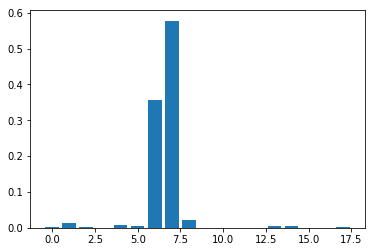

In [155]:
fi_decision_tree= model_est_decision_tree.best_estimator_.feature_importances_
plt.bar(range(len(fi_decision_tree)), fi_decision_tree)
plt.show()

In [156]:
 model_est_decision_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
fn_decision_tree = data.columns
fn_decision_tree

Index(['Compa-Ratio', 'Distance from Work (miles)', 'Is Manager',
       'Is Top Talent', 'Manager's Age', 'Number of Promotions', 'age',
       'length_of_service', 'gender_num', 'manager_gender_num',
       'Ethnicity_White', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Other', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Other'],
      dtype='object')

In [158]:
sorted(zip(reversed(fi_decision_tree), reversed(fn_decision_tree)), reverse=True)

[(0.5779416452643322, 'length_of_service'),
 (0.3561014137071227, 'age'),
 (0.021084724259473005, 'gender_num'),
 (0.014452569513492667, 'Distance from Work (miles)'),
 (0.00837445129416666, "Manager's Age"),
 (0.004890635071936894, 'Number of Promotions'),
 (0.0038866551787842926, 'Ethnicity_Hispanic'),
 (0.003863657219146515, 'Ethnicity_Other'),
 (0.0034834360457080614, 'Is Manager'),
 (0.002745230129393578, 'Marital_Status_Other'),
 (0.002380123477207234, 'Compa-Ratio'),
 (0.000795458839236048, 'Marital_Status_Single'),
 (0.0, 'manager_gender_num'),
 (0.0, 'Marital_Status_Married'),
 (0.0, 'Is Top Talent'),
 (0.0, 'Ethnicity_White'),
 (0.0, 'Ethnicity_Black'),
 (0.0, 'Ethnicity_Asian')]

In [159]:
predictions = model_est_decision_tree.predict(data)
errors = termination_reason_num - predictions
absolute_errors = [abs(error) for error in errors]
sum(absolute_errors)

18

Based on the Decision Tree model, an employee's length of service, age, gender, and distance from work impact resignation rates the most.

## Random Forest

In [132]:
inner_cv = KFold(n_splits=5, shuffle=True)
random_forest_params = {'n_estimators': list(range(10, 30, 5))}
model_est_random_forest = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=inner_cv)

In [133]:
model_est_random_forest.fit(data, termination_reason_num)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [134]:
model_est_random_forest.predict(data)

array([0, 0, 0, ..., 1, 0, 0])

In [135]:
print ("Accuracy:", metrics.accuracy_score(termination_reason_num, model_est_random_forest.predict(data)))
print ("Precision:", metrics.precision_score(termination_reason_num, model_est_random_forest.predict(data)))
print ("Recall:", metrics.recall_score(termination_reason_num, model_est_random_forest.predict(data)))
print ("F1:", metrics.f1_score(termination_reason_num, model_est_random_forest.predict(data)))

Accuracy: 0.9993634627625716
Precision: 1.0
Recall: 0.9895287958115183
F1: 0.9947368421052631


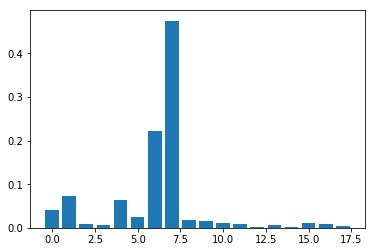

In [136]:
fi_random_forest= model_est_random_forest.best_estimator_.feature_importances_
plt.bar(range(len(fi_random_forest)), fi_random_forest)
plt.show()

In [137]:
 model_est_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
fn_random_forest = data.columns
fn_random_forest

Index(['Compa-Ratio', 'Distance from Work (miles)', 'Is Manager',
       'Is Top Talent', 'Manager's Age', 'Number of Promotions', 'age',
       'length_of_service', 'gender_num', 'manager_gender_num',
       'Ethnicity_White', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Other', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Other'],
      dtype='object')

In [139]:
sorted(zip(reversed(fi_random_forest), reversed(fn_random_forest)), reverse=True)

[(0.47502099187732744, 'length_of_service'),
 (0.22265432706652902, 'age'),
 (0.07263663693163934, 'Distance from Work (miles)'),
 (0.06347843121499727, "Manager's Age"),
 (0.039964616085336704, 'Compa-Ratio'),
 (0.024178378142604075, 'Number of Promotions'),
 (0.018371426876795497, 'gender_num'),
 (0.015788565475563354, 'manager_gender_num'),
 (0.010837720727354748, 'Marital_Status_Married'),
 (0.009874185006450136, 'Ethnicity_White'),
 (0.009058188225484766, 'Marital_Status_Single'),
 (0.008640204791256326, 'Ethnicity_Asian'),
 (0.007597767494262521, 'Is Manager'),
 (0.005998662978916396, 'Is Top Talent'),
 (0.0056585793398696285, 'Ethnicity_Hispanic'),
 (0.005129439556187839, 'Marital_Status_Other'),
 (0.0029355456622431053, 'Ethnicity_Other'),
 (0.0021763325471817773, 'Ethnicity_Black')]

Based on the Random Forest model, an employee's length of service, age, distance from work, and manager's age impact resignation rates the most.

In [140]:
predictions = model_est_random_forest.predict(data)
errors = termination_reason_num - predictions
absolute_errors = [abs(error) for error in errors]
sum(absolute_errors)

4

In [141]:
termination_reason_num[4820:4840], predictions[4820:4840]

([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))